In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.metrics import accuracy_score

In [20]:
data= sns.load_dataset('iris')
data.iloc[:,2:4]


,petal_length,petal_width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


In [116]:
from sklearn.datasets import load_iris


def analyzer(max_depth,max_leaf,max_feature):
    iris = load_iris()
    x = iris.data[:, 2:4]  
    y = iris.target

    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(y)

    clf = DecisionTreeClassifier(max_depth=max_depth,max_leaf_nodes=max_leaf,max_features=max_feature)
    clf.fit(x, y)

    y_pred = clf.predict(x)
    acc = accuracy_score(y, y_pred)


    a = np.arange(x[:, 0].min() - 1, x[:, 0].max() + 1, 0.01)
    b = np.arange(x[:, 1].min() - 1, x[:, 1].max() + 1, 0.01)
    xx, yy = np.meshgrid(a, b)

    input_array = np.array([xx.ravel(), yy.ravel()]).T
    labels = clf.predict(input_array)



    plt.figure(figsize=(8, 6))
    plt.scatter(x[:, 0], x[:, 1], c=y, )
    plt.xlabel('Sepal Length (cm)')
    plt.ylabel('Petal Length (cm)')
    plt.title(f'Decision Tree Decision Regions (Max Depth = {max_depth})\nAccuracy: {acc:.2f}')


    plt.contourf(xx, yy, labels.reshape(xx.shape), alpha=0.5, levels=np.arange(0, 3) - 0.5, )
    plt.show()




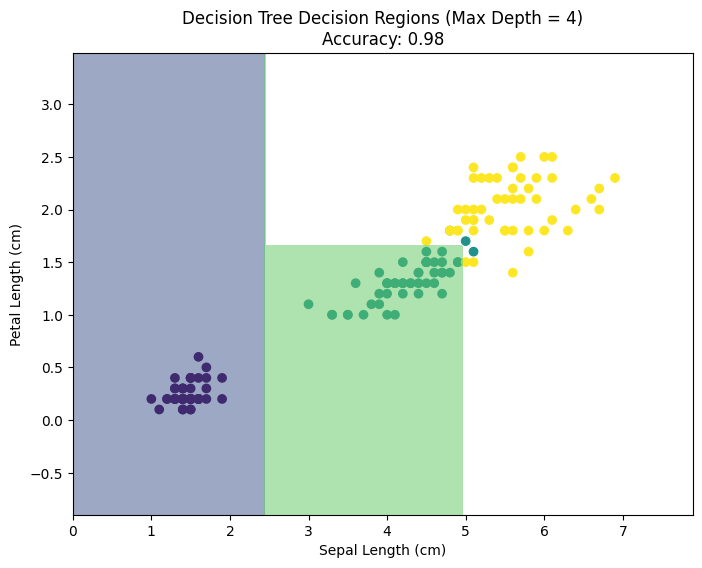

In [117]:
analyzer(max_depth=4,max_leaf=5,max_feature=2)